# Simulations with one Group Size

In [2]:
import sys
sys.path.insert(1, 'Functions')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fitness_funs_non_dim import *
from group_w_pop_funs import *
from scipy.optimize import fsolve
from sim_graph_funs import *

# Situation in which solitary hunters don't overhunt small prey

In [60]:
H=2
x_max = 10
params_pop2 = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 8, β2 = 1, 
                   H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, ξ = 2, d = 100,
                 Tx = .01, r = 0, γ = 0, pop_process = True)

In [61]:
P_reg = 5; N1_reg = 1; N2_reg = 1
F_of_x_vec = np.zeros(x_max)
x=1
F_of_x_vec[x-1] = P_reg/x
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec];

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

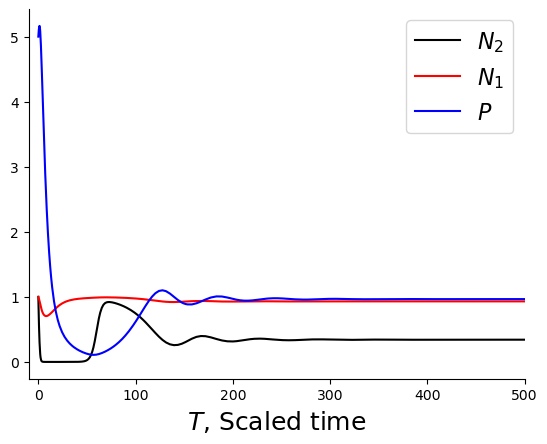

In [62]:
params = params_pop2.copy()
x=1

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,500])

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

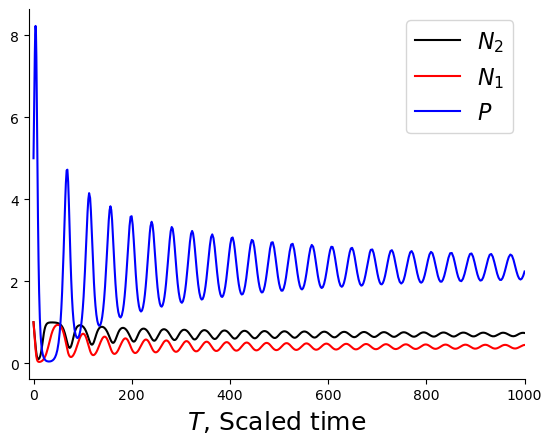

In [70]:
params = params_pop2.copy()
x=3

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,1000])

# Compare with Same parameters to groups evolving

In [72]:
params = params_pop2.copy()
params['Tx'] = .01
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec]; 
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, mean_x = get_results(out2, x_max)

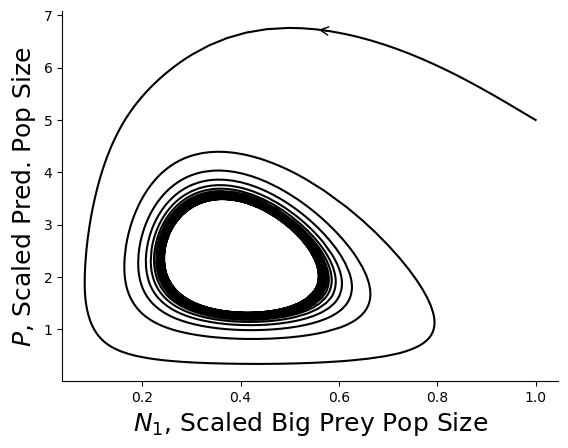

In [78]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[120])

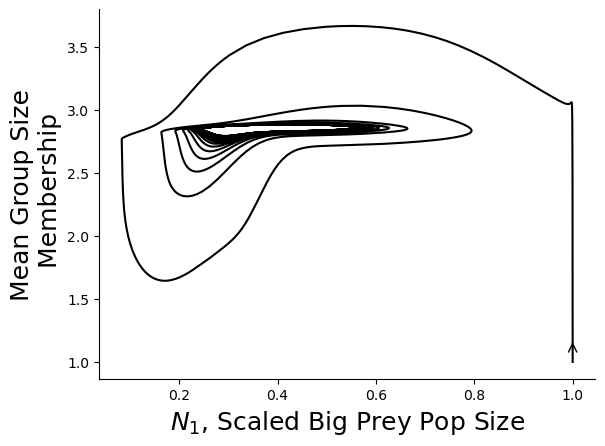

In [82]:
fig, ax = plot_x_vs_y(N1,mean_x, N1lab,mean_x_lab,[10])

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

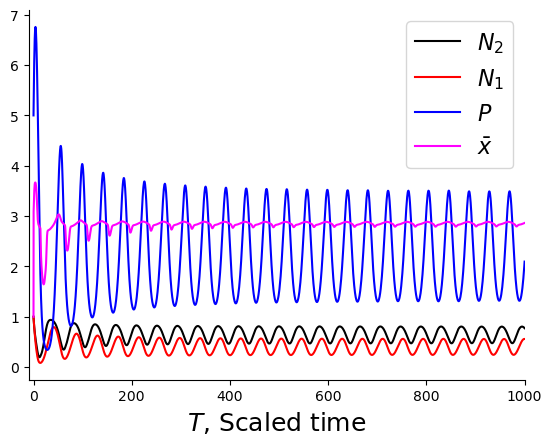

In [74]:
plot_all(T, N1, N2, P, mean_x, xlim = [-10,1000])

In [ ]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[90])